In [32]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix as cm,
    accuracy_score as acc,
    precision_score as prec,
    recall_score as rec,
    f1_score as f1
)
import matplotlib.pyplot as plt
import seaborn as sns
from ml_model_eval import pred_proba_plot, plot_cross_val_confusion_matrix, plot_learning_curve

In [2]:
matches = pd.read_csv("../matches_after_preprocessing.csv")

In [3]:
matches

,Unnamed: 0,date,time,round,day,venue,result,gf,ga,opponent,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,0,2024-08-17,12:30,Matchweek 1,Sat,Away,W,2.0,0.0,Ipswich Town,...,12,5,3.000000,1.666667,25.000000,10.666667,15.733333,0.000000,0.0,0.0
1,1,2024-08-25,16:30,Matchweek 2,Sun,Home,W,2.0,0.0,Brentford,...,16,6,2.333333,1.000000,22.666667,8.333333,15.566667,0.000000,0.0,0.0
2,2,2024-09-01,16:00,Matchweek 3,Sun,Away,W,3.0,0.0,Manchester Utd,...,16,6,2.000000,0.000000,24.333333,8.666667,14.400000,0.333333,0.0,0.0
3,3,2024-09-14,15:00,Matchweek 4,Sat,Home,L,0.0,1.0,Nott'ham Forest,...,15,5,2.333333,0.000000,16.000000,5.333333,13.933333,0.333333,0.0,0.0
4,4,2024-09-21,15:00,Matchweek 5,Sat,Home,W,3.0,0.0,Bournemouth,...,15,5,1.666667,0.333333,14.666667,5.333333,13.966667,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,2417,2022-04-30,15:00,Matchweek 35,Sat,Away,L,0.0,2.0,Aston Villa,...,15,5,1.333333,2.000000,12.333333,4.000000,18.166667,0.666667,0.0,0.0
2418,2418,2022-05-08,14:00,Matchweek 36,Sun,Home,L,0.0,4.0,West Ham,...,14,6,0.666667,2.666667,9.666667,3.000000,18.900000,0.666667,0.0,0.0
2419,2419,2022-05-11,19:45,Matchweek 21,Wed,Away,L,0.0,3.0,Leicester City,...,19,2,0.000000,3.000000,7.333333,2.333333,19.666667,0.666667,0.0,0.0
2420,2420,2022-05-15,14:00,Matchweek 37,Sun,Away,D,1.0,1.0,Wolves,...,14,6,0.000000,3.000000,8.666667,3.333333,20.266667,0.333333,0.0,0.0


In [8]:
train = matches[matches["date"] < '2022-11-01']
test = matches[matches["date"] > '2022-11-01']

In [9]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "gf_rolling", "ga_rolling", "sh_rolling", "sot_rolling", "dist_rolling", "fk_rolling", "pk_rolling", "pkatt_rolling"]
X_train = train[predictors]
y_train = train["target"]
X_test = test[predictors]
y_test = test["target"]

In [11]:
#Fit model và dự đoán
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [1]:
#  Tính metrics
conf_matrix = cm(y_test, y_pred)
accuracy = acc(y_test, y_pred)
precision = prec(y_test, y_pred)
recall = rec(y_test, y_pred)
f1_score = f1(y_test, y_pred)

NameError: name 'cm' is not defined

In [14]:
print("Confusion Matrix:\n", conf_matrix)
print(f"\nAccuracy Score: {accuracy:.3f}")
print(f"Precision Score: {precision:.3f}")
print(f"Recall Score: {recall:.3f}")
print(f"F1 Score: {f1_score:.3f}")

Confusion Matrix:
 [[759 142]
 [404 174]]

Accuracy Score: 0.631
Precision Score: 0.551
Recall Score: 0.301
F1 Score: 0.389


In [28]:
#  Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=skf)
cv_accuracy = np.mean(cv_scores) * 100

print(f'\nCross-Validation Accuracy Score: {cv_accuracy:.1f}%')


Cross-Validation Accuracy Score: 62.9%


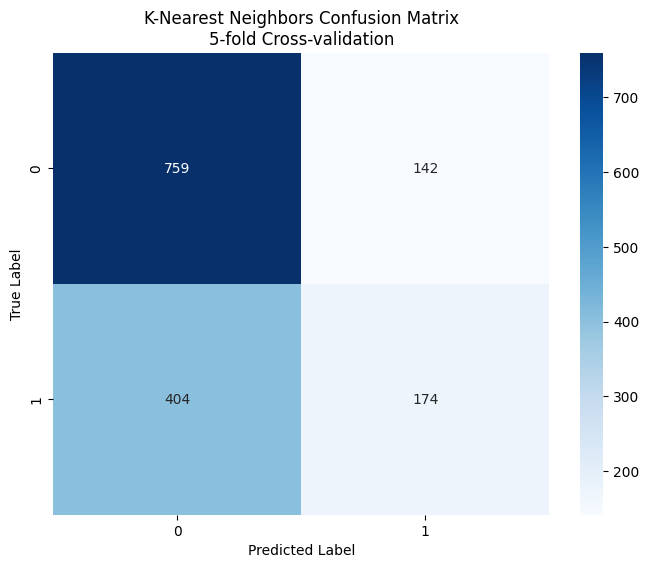

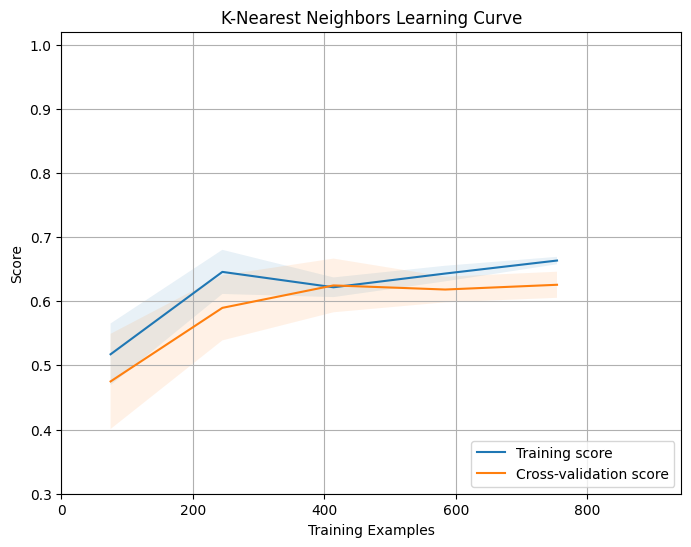

In [36]:
plot_cross_val_confusion_matrix(conf_matrix, display_labels='', 
                              title='K-Nearest Neighbors Confusion Matrix', cv=5)
plt.show()

plot_learning_curve(knn, X_train, y_train, scoring='accuracy', 
                   training_set_size=5, cv=5, x_min=0, x_max=len(X_train), 
                   y_min=0.3, y_max=1.02, 
                   title='K-Nearest Neighbors Learning Curve', leg_loc=4)
plt.show()